<h1 style="text-align:center">Eigenvalue/Eigenvector Analysis <br>for Undamped Systems</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/TwoMass_3spring.png" alt="A Two-Mass-Spring System" width=50%/></a><br>
    <strong> Figure 1: A Two-Mass-Spring System</strong>
</p>

This notebook demonstrates the eigenvalue/eigenvector problem using a two-mass-spring-damper system shown in Figure 1. We'll just look at one example set of parameters. The same techniques apply for other parameters and for larger matrices. 

The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = 0 $

$ \quad m_2 \ddot{x}_2 -k_2 x_1 +(k_2 + k_3)x_2 = 0 $

We could also write these equations in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} + \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix} $

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$. This is an eigenvalue problem.

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [8]:
import numpy as np
import sympy

sympy.init_printing()

In [9]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [10]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

Using [SymPy](http://sympy.org), we can solve for the eigenvalues and eigenvalues symbolically. We'll first set up and solve the problem just as we would by hand, just replacing the algebra of the solution with SymPy. Then, we'll use the State-space and Symmetric forms of the equations of motion to allow us to directly use the Sympy eigenvalue and eigenvector methods.

In [72]:
# Define the symbols
m1, m2, k1, k2, k3 = sympy.symbols('m_1 m_2 k_1 k_2 k_3')

w, w1, w2 = sympy.symbols('omega omega_1 omega_2')

x1, x2 = sympy.symbols('x_1 x_2')

M = sympy.Matrix([[m1, 0],
                 [0,  m2]])

K = sympy.Matrix([[k1 + k2, -k2],
                 [-k2,      k2 + k3]])

In [63]:
# create the matrix to solve
KM = K - w**2 * M

eigenvalues = sympy.solve(KM.det(), w**2)

In SymPy, the easiest way to output the answer is to call it in its own cell.

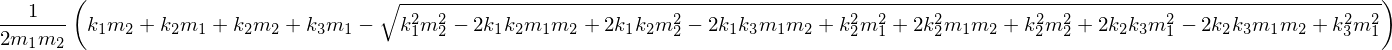

In [67]:
eigenvalues[0]

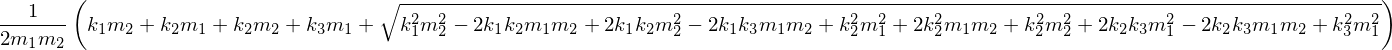

In [66]:
eigenvalues[1]

We can substiute numerical values, to check is our symbolic solutions match the ones found numerically in the [notebook using the SciPy linalg library](http://nbviewer.jupyter.org/github/DocVaughan/MCHE485---Mechanical-Vibrations/blob/Spring2016/Jupyter%20Notebooks/Eigenvalue-Eigenvector%20Analysis.ipynb). In that notebook, we used

$ \quad m_1 = m_2 = 1.0 $ kg

and 

$ \quad k_1 = k_2 = k_3 = 4.0 $ $N/m^2$

to find eigenalues of 4.00 and 12.00. The eigenvectors were found to be:

$ \quad X_1 = [1 \ 1]^T $ 

and 

$ \quad X_2 = [1 \ -1]^T $ 

In [69]:
eigenvalues[0].subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)])

In [71]:
eigenvalues[1].subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)])

So, the symbolic eigenvalues we found match those found numerically. Now, let's look at the eigenvectors.

In [90]:
KM1 = K - eigenvalues[0] * M
KM2 = K - eigenvalues[1] * M

X = sympy.Matrix([[x1], 
                   [x2]])

In [100]:
eigenvect1 = sympy.solve(KM1 * X, (x1, x2))
eigenvect2 = sympy.solve(KM2 * X, (x1, x2))

Because our system of equations is linearly dependent, SymPy will return one of the values in terms of the other, similar to how we solve these problems by hand. So, we can look at the relationship returned to generate the eigenvector.

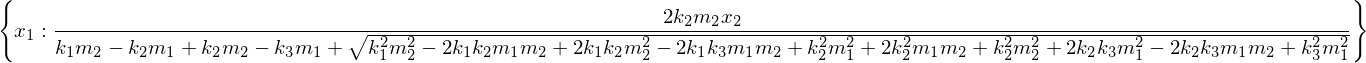

In [101]:
eigenvect1

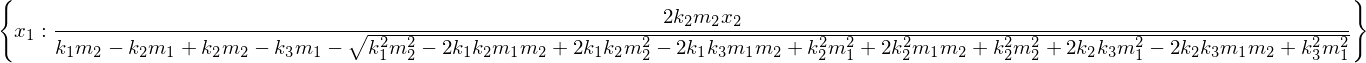

In [102]:
eigenvect2

We can again substitute the numerical values to check the solution we obtain.

In [94]:
eigenvect1[x1].subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)])

We see that $x_1 = x_2$ for this eigenvector, matching our numerical solutions. 

In [96]:
eigenvect2[x1].subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)])

We see that $x_1 = -x_2$ for this eigenvector, matching our numerical solutions. 

# Using the State-Space Form of the Equations of Motion
Now, let's define a new matrix $A$ that is generated using the state-space form of the equations of motion. We'll again substitute the parameters we used in the numerical solution to check for a match.

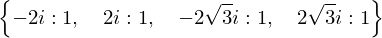

In [115]:
A = sympy.Matrix([[0, 1, 0, 0],
            [-(k1 + k2) / m1, 0, k2 / m1, 0],
            [0, 0, 0, 1],
            [k2 / m2, 0, -(k2 + k3) / m2, 0]])

A.subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)]).eigenvals()

Remember that in the state-space form, for lightly damped systems the eigenvalues approximately represent:

$ \quad \lambda = -\zeta \omega_i \pm i \omega_{di} $ 

where

$\zeta_i$ is the damping ratio, $\omega_{i}$ is the natural frequency, $\omega_{di}$ is the damped natural frequency for the $i^{th}$ mode. Be careful not to confuse the $_i$ subscripts with $i$ as an imaginary number.

Here, there is no damping, so $\zeta = 0$ and $\omega_{d} = \omega_i$ for all modes. So, we again see that the calculated eigenvalues match those found numerically.

Now, let's use the SymPy eigenvector method on the state space matrix, after substituting our numerical values.

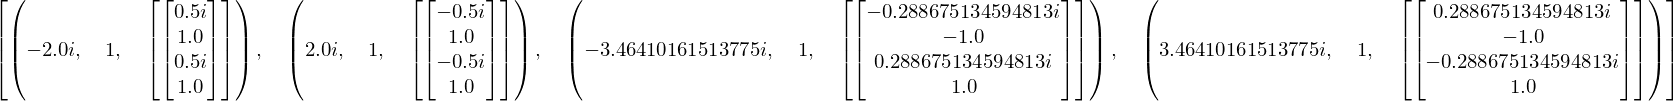

In [117]:
A.subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)]).eigenvects()

The SymPy ```eigenvects()``` function returns the eigenvalue, its multiplicity, and the eigenvector. For our choice of states in the state vector, we want to look at the 1st and 3rd value of each eigenvectors, as they correspond to the motion of $x_1$ and $x_2$. We can also multiply each by $i$ to make them real.

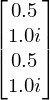

In [135]:
A.subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)]).eigenvects()[1][2][0] * sympy.I

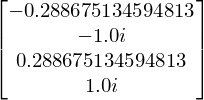

In [137]:
A.subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)]).eigenvects()[3][2][0] * sympy.I

We see that these vectors have the same proportions as those calculated by the purely numerical method.

# Using the Symmetric Form
Using the matrices from the equations of motion, we can define two new matrices, $A$ and $B$, by:

$ \quad A = \left[\begin{array}{cc}\hphantom{-}0 & -K \\-K & -C\end{array}\right] \ \ \ \ \ \ \ B = \left[\begin{array}{cc}-K & 0 \\ \hphantom{-}0 & M\end{array}\right]$

In this case, $ C = 0 $, so the equations reduce to:

$ \quad A = \left[\begin{array}{cc}\hphantom{-}0 & -K \\-K & 0\end{array}\right] \ \ \ \ \ \ \ B = \left[\begin{array}{cc}-K & 0 \\ \hphantom{-}0 & M\end{array}\right]$

In [ ]:
A = sympy.Matrix([[0, 0, -(k1 + k2), k2],
                  [0, 0, k2, (-k2 + k3)],
                  [-(k1 + k2), k2, 0, 0],
                  [k2, (-k2 + k3), 0, 0]])

B = sympy.Matrix([[-(k1 + k2), k2, 0, 0],
                  [k2, (-k2 + k3), 0, 0],
                  [0, 0, m1, 0],
                  [0, 0, 0, m2]])

A.subs([(m1, 1.0), (m2, 1.0), (k1, 4.0), (k2, 4.0), (k3, 4.0)]).eigenvals()

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [14]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())